In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
cd c:\\

c:\


In [5]:
df=pd.read_csv("advertising.csv")

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [10]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


(200, 4)

In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

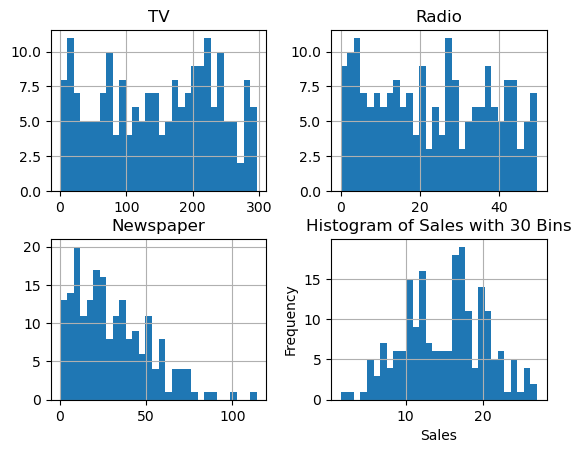

In [14]:
df.hist(bins=30)
plt.title('Histogram of Sales with 30 Bins')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

C:\Users\prati\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


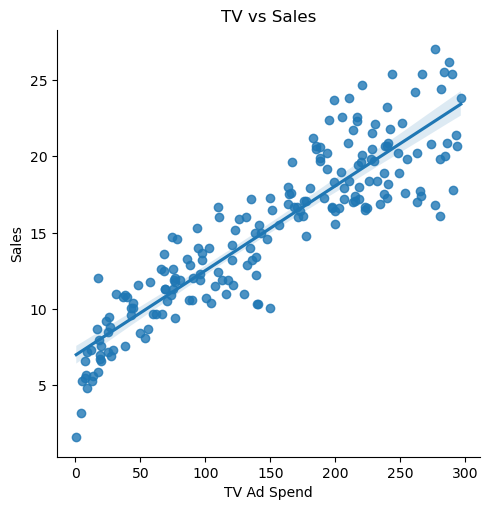

C:\Users\prati\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


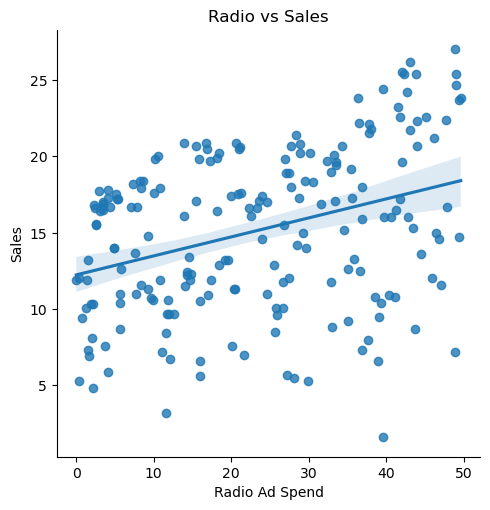

C:\Users\prati\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


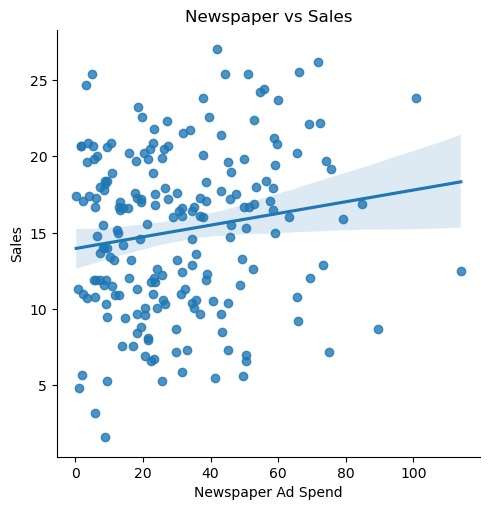

In [16]:
sns.lmplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')
plt.xlabel('TV Ad Spend')
plt.ylabel('Sales')
plt.show()

sns.lmplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')
plt.xlabel('Radio Ad Spend')
plt.ylabel('Sales')
plt.show()

sns.lmplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper Ad Spend')
plt.ylabel('Sales')
plt.show()

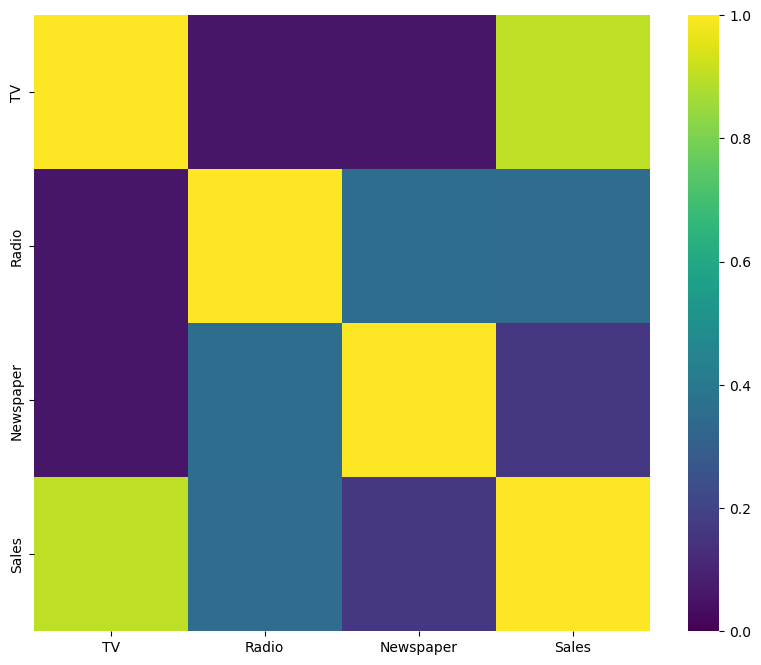

In [17]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="viridis", ax=ax)
plt.show()

In [18]:
X = df.drop('Sales', axis=1)
y = df[['Sales']]

# Use a different test_size and random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
lin_model_sklearn = LinearRegression()
lin_model_sklearn.fit(X, y)

LinearRegression()

In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.5562135800000023


C:\Users\prati\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [21]:
new_data = pd.DataFrame({'TV': [125], 'Radio': [100], 'Newspaper': [50]})
predicted_sales = rf_model.predict(new_data)
print(f"Predicted Sales: {predicted_sales}")

Predicted Sales: [16.124]
